# Datasources
Python Notebook for exploring and analyzing the datasources used in this project

## Setup
### Install Dependencies

In [1]:
%pip install pandas
%pip install matplotlib
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Datasource1: Charging Infrastructure

### Load and Clean the Data

In [3]:
data_path = 'https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/E_Mobilitaet/Ladesaeuleninfrastruktur.xlsx?__blob=publicationFile'

# Load the excel sheet
ds1 = pd.read_excel(data_path,
                    sheet_name='4.1 Ladepunkte je BL',
                    header=[6, 7],
                    index_col=4)

# Drop unimportant rows and columns
ds1 = ds1.iloc[:-1, 4:]

# Assign index and column names
ds1.columns.names = ['Date', 'Type']
ds1.index.name = 'State'

# Overview of the cleaned table
ds1

Date                   2017-01-01                2017-04-01                 \
Type                          NLP    SLP  gesamt        NLP    SLP  gesamt   
State                                                                        
Baden-Württemberg           701.0  145.0   846.0      750.0  167.0   917.0   
Bayern                     1325.0  187.0  1512.0     1481.0  202.0  1683.0   
Berlin                      489.0   18.0   507.0      516.0   22.0   538.0   
Brandenburg                  38.0    6.0    44.0       39.0    8.0    47.0   
Bremen                        8.0    0.0     8.0       16.0    0.0    16.0   
Hamburg                     319.0   13.0   332.0      382.0   18.0   400.0   
Hessen                      368.0   54.0   422.0      421.0   54.0   475.0   
Mecklenburg-Vorpommern       58.0   10.0    68.0       58.0   10.0    68.0   
Niedersachsen               492.0   62.0   554.0      518.0   68.0   586.0   
Nordrhein-Westfalen        1265.0   54.0  1319.0     1351.0   56.0  1407.0   
Rheinland-Pfalz             177.0   28.0   205.0      188.0   30.0   218.0   
Saarland                     16.0    0.0    16.0       18.0    0.0    18.0   
Sachsen                     197.0   12.0   209.0      206.0   12.0   218.0   
Sachsen-Anhalt               51.0   33.0    84.0       56.0   35.0    91.0   
Schleswig-Holstein          230.0   29.0   259.0      325.0   34.0   359.0   
Thüringen                    87.0   24.0   111.0      112.0   28.0   140.0   
Summe                      5821.0  675.0  6496.0     6437.0  744.0  7181.0   

Date                   2017-07-01                2017-10-01  ... 2022-07-01  \
Type                          NLP    SLP  gesamt        NLP  ...     gesamt   
State                                                        ...              
Baden-Württemberg           781.0  184.0   965.0      865.0  ...    11950.0   
Bayern                     1583.0  223.0  1806.0     1836.0  ...    14668.0   
Berlin                      543.0   22.0   565.0      591.0  ...     2144.0   
Brandenburg                  50.0    8.0    58.0       68.0  ...     1511.0   
Bremen                       44.0    0.0    44.0       65.0  ...      447.0   
Hamburg                     432.0   24.0   456.0      552.0  ...     1802.0   
Hessen                      495.0   71.0   566.0      596.0  ...     5386.0   
Mecklenburg-Vorpommern       62.0   15.0    77.0       84.0  ...      860.0   
Niedersachsen               647.0   85.0   732.0      743.0  ...     7024.0   
Nordrhein-Westfalen        1429.0   66.0  1495.0     1514.0  ...    12536.0   
Rheinland-Pfalz             201.0   32.0   233.0      237.0  ...     2615.0   
Saarland                     18.0    0.0    18.0       30.0  ...      606.0   
Sachsen                     212.0   22.0   234.0      229.0  ...     2871.0   
Sachsen-Anhalt               68.0   40.0   108.0       94.0  ...     1178.0   
Schleswig-Holstein          362.0   38.0   400.0      406.0  ...     2997.0   
Thüringen                   128.0   34.0   162.0      195.0  ...     1355.0   
Summe                      7055.0  864.0  7919.0     8105.0  ...    69950.0   

Date                   2022-10-01                   2023-01-01           \
Type                          NLP      SLP   gesamt        NLP      SLP   
State                                                                     
Baden-Württemberg         11202.0   1928.0  13130.0    12723.0   2173.0   
Bayern                    13272.0   2345.0  15617.0    14346.0   2617.0   
Berlin                     1826.0    286.0   2112.0     1988.0    355.0   
Brandenburg                1243.0    340.0   1583.0     1308.0    379.0   
Bremen                      412.0     58.0    470.0      515.0     68.0   
Hamburg                    1625.0    267.0   1892.0     1784.0    309.0   
Hessen                     4991.0    834.0   5825.0     5370.0    949.0   
Mecklenburg-Vorpommern      725.0    221.0    946.0      768.0    231.0   
Niedersachsen              6179.0

### Visualize the Data

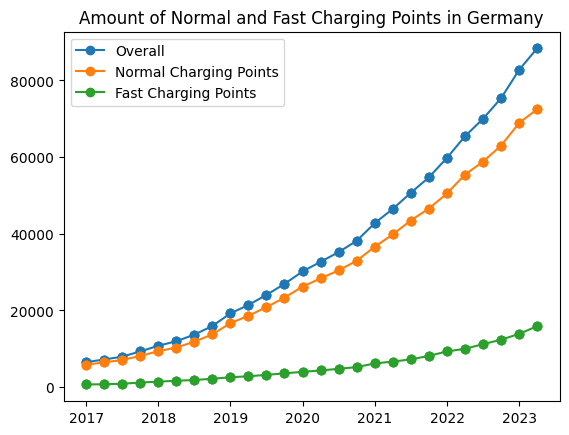

In [4]:
ds_v = ds1.loc['Summe']
dates = list(map(lambda i: i[0], ds_v.index))
gesamt = [ds_v[(date, 'gesamt')] for date in dates]
nlp = [ds_v[(date, 'NLP')] for date in dates]
slp = [ds_v[(date, 'SLP')] for date in dates]

plt.plot(dates, gesamt, 'o-', dates, nlp, 'o-', dates, slp, 'o-')
plt.legend(['Overall', 'Normal Charging Points', 'Fast Charging Points'])
plt.title('Amount of Normal and Fast Charging Points in Germany')
plt.show()

## Datasource2.1: New Registrations of Motor Vehicles with Alternative Drive Systems over Time

### Load and Clean the Data

In [5]:
data_path = 'https://www.kba.de/SharedDocs/Downloads/DE/Statistik/Fahrzeuge/FZ28/fz28_2023_03.xlsx?__blob=publicationFile'

# Load the excel sheet
ds2_2 = pd.read_excel(data_path,
                      sheet_name='FZ 28.2',
                      header=None,
                      index_col=1)

# Drop unimportant rows and columns
# Note: Just use the colums for electric cars and Plug-in-Hybrids because just that are 
# important for correlating with the charging infrastructure
ds2_2 = ds2_2.iloc[12:107, [1, 6, 8]]

# Rename the columns
ds2_2.columns = ['Overall', 'Electric', 'Hybrid (Plug-in)']

# Just take the rows for the annual amounts
ds2_2 = ds2_2.loc[list(filter(lambda i: 'Jahr' in i,  ds2_2.index))]

# Rename the index values 
ds2_2.index = pd.Index(map(lambda i: int(i.split(' ')[1]), ds2_2.index))
ds2_2.index.name = 'Year'

# Drop year 2023
ds2_2 = ds2_2.drop(2023)

# Overview of the cleaned table
ds2_2

,Overall,Electric,Hybrid (Plug-in)
Year,,,
2022,2651357,470559,362093
2021,2622132,355961,325449
2020,2917678,194163,200469
2019,3607258,63281,45348
2018,3435778,36062,31442
2017,3441262,25056,29436
2016,3351607,11410,13744


### Visualize the Data

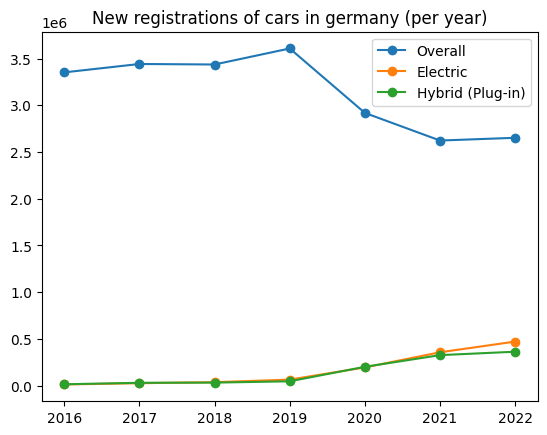

In [6]:
plt.plot(ds2_2, 'o-')
plt.title('New registrations of cars in germany (per year)')
plt.legend(ds2_2.columns)
plt.show()

## Datasource2.2: New Registrations of Motor Vehivles with Alternative Drive Systems by German States

### Load and Clean the Data

In [7]:
year = 2022
data_path = f'https://www.kba.de/SharedDocs/Downloads/DE/Statistik/Fahrzeuge/FZ28/fz28_{year}_12.xlsx?__blob=publicationFile'

# Load the excel sheet
ds2_2 = pd.read_excel(data_path,
                      sheet_name='FZ 28.9',
                      header=None,
                      index_col=1)

# Drop unimportant rows and columns
ds2_2 = ds2_2.iloc[30:47, [1, 6, 8]]

# Rename the columns
ds2_2.columns = ['Overall', 'Electric', 'Hybrid (Plug-in)']

# Rename the first index value
ds2_2.index.values[0] = 'Gesamt'

# Assign index name
ds2_2.index.name = 'State'

# Overview of the cleaned table
ds2_2

,Overall,Electric,Hybrid (Plug-in)
State,,,
Gesamt,2651357,470559,362093
Baden-Württemberg,367051,71328,57578
Bayern,549542,95766,70099
Berlin,66204,10479,9344
Brandenburg,49331,8164,6346
Bremen,15665,2459,2258
Hamburg,84411,9149,10976
Hessen,279749,47846,40283
Mecklenburg-Vorpommern,27668,3883,2785


### Define Dictionary with the offical Abbreviations for the German States
based on https://www.datenportal.bmbf.de/portal/de/G122.html <br>
or https://www.destatis.de/DE/Methoden/abkuerzung-bundeslaender-DE-EN.html

In [8]:
country_code = {
    'Baden-Württemberg': 'BW',
    'Bayern': 'BY',
    'Berlin': 'BE',
    'Brandenburg': 'BB',
    'Bremen':'HB',
    'Hamburg':'HH',
    'Hessen':'HE',
    'Mecklenburg-Vorpommern':'MV',
    'Niedersachsen':'NI',
    'Nordrhein-Westfalen':'NW',
    'Rheinland-Pfalz':'RP',
    'Saarland':'SL',
    'Sachsen':'SN',
    'Sachsen-Anhalt':'ST',
    'Schleswig-Holstein':'SH',
    'Thüringen':'TH'
}

### Visualize the Data

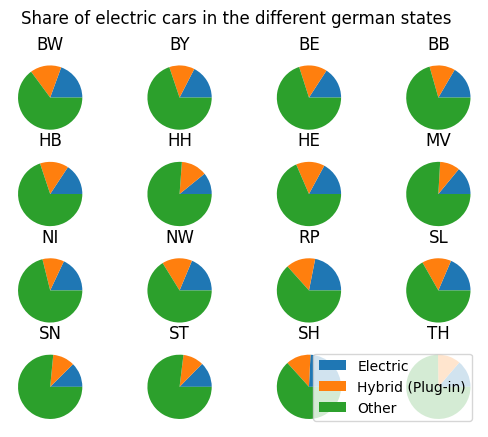

In [9]:
#plt.pie(ds2_1['ELectric','Bayern'])
#plt.show()
ds2_2['Other'] = ds2_2['Overall'] - ds2_2['Electric'] - ds2_2['Hybrid (Plug-in)']

for i, state in enumerate(ds2_2.index[1:]):
    plt.subplot(4, 4, i+1)
    plt.pie(ds2_2.loc[state, ['Electric','Hybrid (Plug-in)','Other']])
    plt.title(country_code[state])

plt.legend(['Electric','Hybrid (Plug-in)','Other'], loc='upper right')
plt.suptitle('Share of electric cars in the different german states')
plt.show()

## Datasource3: German States with Capitals by Area, Population and Population Density

### Load and Clean the Data
From this data source, we are only interested in the area for the states, so the other columns and rows are gonna be cleaned out

In [10]:
data_path = 'https://www.destatis.de/DE/Themen/Laender-Regionen/Regionales/Gemeindeverzeichnis/Administrativ/02-bundeslaender.xlsx?__blob=publicationFile'

# Load the excel sheet
ds3 = pd.read_excel(data_path,
                    sheet_name='Bundesländer_mit_Hauptstädten',
                    usecols=[0,2],
                    header=None,
                    index_col=None)

# Drop unimportant rows
ds3 = ds3.iloc[7:-16]

# Rename the columns
ds3.columns = ['State', 'Area']

# Remove the number from each state name
ds3['State'] = ds3['State'].apply(lambda x: x[4:] if type(x) is str else x)

# 
ds3.iloc[-1, 0] = 'Germany'

# Drop the rows which contain NaN (= rows for the states capitals)
ds3 = ds3.dropna()

# Set the State column as the index
ds3.set_index('State', inplace=True)

# Overview of the cleaned table
ds3

,Area
State,
Schleswig-Holstein,15804.3
Hamburg,755.09
Niedersachsen,47709.86
Bremen,419.37
Nordrhein-Westfalen,34112.61
Hessen,21115.63
Rheinland-Pfalz,19857.97
Baden-Württemberg,35747.85
Bayern,70541.58


### Visualize the Data

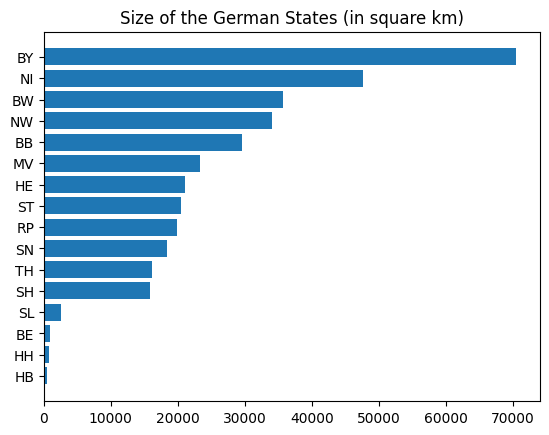

In [11]:
ds_v = ds3.sort_values(by='Area', ascending=True)
ds_v = ds_v.drop(index='Germany')
ds_v['Label'] = [country_code[state] for state in ds_v.index]

plt.barh(ds_v['Label'], ds_v['Area'])
plt.title('Size of the German States (in square km)')
plt.show()